# **AdvDS - Assignment 1: Binary Classification - NBA Player Prediction - Data Preparation**

Build a binary classification model that can predict if a rookie player will last at least 5 years in the NBA

**Student Name:** Nathan Fragar

**Student No. :** 93087548

**Week:** 2

**Date:** 20FEB2022

**Team Name:** Group 1
* Nuwan Munasinghe
* Wenyingwuwy
* Nathan Fragar
* Sean Williams

## 1. Load Dataset

**[1.1]** Task: Import required packages: Pandas, Numpy, joblib

In [484]:
# Task: Import the pandas, numpy, scipy stats and joblib package
import pandas as pd
import numpy as np
from scipy import stats
import joblib as job

**[1.2]** Task: Change working directory to /home/jovyan/work

In [485]:
cd /home/jovyan/work

/home/jovyan/work


**[1.3]** Task: Load Processed Data

In [486]:
from src.data.sets import load_sets

In [487]:
X_train, y_train, X_val, y_val, X_test, y_test = load_sets(path='data/processed/', val=False)

**[1.4]** Task: Automatically Reload Modules

In [488]:
# Automatically reload modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 3. Create Baseline Model

**[3.1]** Task: Find the mode of the target variable and print it's value

In [489]:
y_mode = np.array(stats.mode(y_train)[0])
print(y_mode)

[1]


**[3.2]** Task: Create a numpy array called y_base filled with this value

In [490]:
y_shape = (len(y_train), 1)
y_base = np.full(y_shape, y_mode)

**[3.3]** Task: Import the accuracy score from sklearn

In [491]:
from src.models.performance import print_reg_perf

**[3.4]** Task: Display the accuracy score of this baseline model

In [492]:
# print_reg_perf(y_train, y_base, set_name="Baseline")

The null accuracy is 83.35%
If we predict 1, we'll be correct 83.35% of the time

## 4. Logistic Regression - Hyperparameter Tuning with Grid Search and KFold

Train Logistic Regression Algorithm

1.   Use Grid Search to tune Hyper Parameters
2.   Use KFold with 5 Splits
3.   Fit Algorithm

**[4.1]** Task: Import GridSearchCV, KFold from sklearn.model_selection

In [493]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,KFold

**[4.2]** Create a dictionary containing the Randomized Grid Search Parameters

In [494]:
# Linear Regression Random Grid Parameters
# Class Weight
class_weight = ['balanced']
# Penalty
penalty = ['none','l2','l1','elasticnet']
# Solver
solver = ['liblinear','lbfgs']
# max_iter
max_iter = [500]

random_grid = {'class_weight': class_weight,
               'penalty':penalty,
               'solver':solver,
               'max_iter':max_iter
               }



In [495]:
random_grid

{'class_weight': ['balanced'],
 'penalty': ['none', 'l2', 'l1', 'elasticnet'],
 'solver': ['liblinear', 'lbfgs'],
 'max_iter': [500]}

**[4.3]** Task: Create RF Model, and use Randomized Search to find GridSearch range

In [496]:
 from sklearn.linear_model import LogisticRegression as LR

In [497]:
lr_base = LR()
lr_random = RandomizedSearchCV(estimator = lr_base,
                               param_distributions = random_grid,
                               n_iter = 50, 
                               cv = 5,
                               verbose=2,
                               random_state=8, 
                               n_jobs = 4)

**[4.4]** Train Model

In [498]:
# Import Beep
from src.indicator.sounds import beep_when_done

In [499]:
lr_random.fit(X_train, y_train)

# Beep when completed
#beep_when_done()

print(lr_random.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", lin

{'solver': 'lbfgs', 'penalty': 'none', 'max_iter': 500, 'class_weight': 'balanced'}


"print(lr_random.best_params_)"

{'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 500, 'class_weight': 'balanced'}

In [500]:
lr_best = LR(solver='lbfgs', penalty='l2', max_iter=500, class_weight='balanced').fit(X_train, y_train)

In [501]:
from src.models.performance import score_models

In [502]:
score_models(X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val, y_base = y_base, includeBase = True, model = lr_best)

,Set Name,ACC,MSE,MAE,PREC,RECALL,F1,AUC
0,Train,0.648438,0.592927,0.351562,0.903057,0.647798,0.754420,0.710437
1,Validate,0.646250,0.594769,0.353750,0.901674,0.646177,0.752838,0.701607


**Observation** Training Model is overfitting

**[4.5]** Tune Hyperparameters to better reduce overfitting.

1. Reduce Depth to and 
2. increase min samples per leaf to 10

In [503]:
lr_best_1 = LR(solver='lbfgs', penalty='none', max_iter=1000, class_weight='balanced').fit(X_train, y_train)

In [504]:
score_models(X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val, y_base = y_base, includeBase = True, model = lr_best_1)

,Set Name,ACC,MSE,MAE,PREC,RECALL,F1,AUC
0,Train,0.651719,0.590154,0.348281,0.902958,0.652296,0.757427,0.711458
1,Validate,0.648750,0.592663,0.351250,0.902923,0.648426,0.754799,0.698676


**Observations**
* Validation Dataset is not performing well for the model, indicating Model is overfitting on Train Dataset

**[4.5.2]** Task: Attempt to use L2 Penalty

In [505]:
lr_best_2 = LR(solver='lbfgs', penalty='l2', max_iter=1000, class_weight='balanced').fit(X_train, y_train)

In [506]:
score_models(X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val, y_base = y_base, includeBase = True, model = lr_best_2)

,Set Name,ACC,MSE,MAE,PREC,RECALL,F1,AUC
0,Train,0.648438,0.592927,0.351562,0.903057,0.647798,0.754420,0.710437
1,Validate,0.646250,0.594769,0.353750,0.901674,0.646177,0.752838,0.701607


[4.5.3] Task: Attempt to use liblinear solver and L1 Penalty

In [507]:
lr_best_3 = LR(solver='liblinear', penalty='l1', max_iter=1000, class_weight='balanced').fit(X_train, y_train)

In [508]:
score_models(X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val, y_base = y_base, includeBase = True, model = lr_best_3)

,Set Name,ACC,MSE,MAE,PREC,RECALL,F1,AUC
0,Train,0.648438,0.592927,0.351562,0.904537,0.646485,0.754045,0.710240
1,Validate,0.648125,0.593191,0.351875,0.901145,0.649175,0.754684,0.701212


**[4.6]** Task: Plot Confusion Matrix

Identify how well the model is performing at predicting the outcome

In [509]:
from src.visualization.visualize import plot_confusion_matrix_full

Train - Confusion matrix, without normalization
[[ 691  374]
 [1855 3480]]
Train - Normalized confusion matrix
[[0.64882629 0.35117371]
 [0.34770384 0.65229616]]
Validate - Confusion matrix, without normalization
[[173  93]
 [469 865]]
Validate - Normalized confusion matrix
[[0.65037594 0.34962406]
 [0.35157421 0.64842579]]


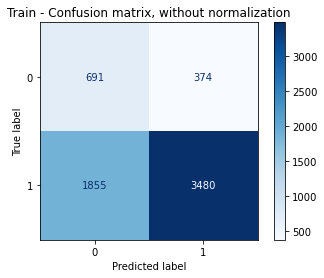

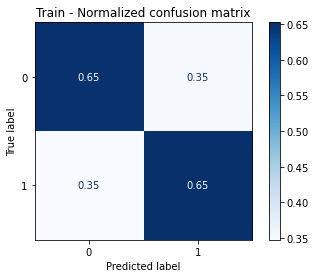

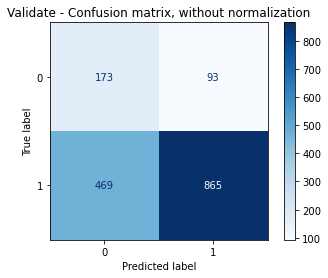

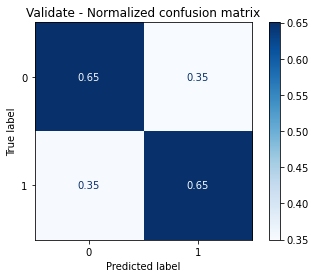

In [510]:
plot_confusion_matrix_full(model = lr_best_1 ,X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val)

**Observation** Both Models is predicting alot of False Positives (FP) in both training and validation datasets

**[4.7]** Task: Calculate AUROC

In [511]:
from sklearn.metrics import roc_auc_score

In [512]:
lr_best_1_y_train_proba = lr_best_1.predict_proba(X_train)[:, 1]
lr_best_1_y_val_proba = lr_best_1.predict_proba(X_val)[:, 1]
print("rf_best_1_proba:", lr_best_1_y_train_proba)

rf_best_1_proba: [0.51965201 0.09627373 0.65765874 ... 0.41742965 0.48709772 0.76721697]


In [513]:
roc_auc_score(y_train, lr_best_1_y_train_proba)

0.7114577750790906

In [514]:
roc_auc_score(y_val, lr_best_1_y_val_proba)

0.6986760379208891

**Observations** 
* Training Dataset has a AUROC prediction 0.711
* Validation Dataset has a poor AUROC prediction 0.698. This indicates the model is fitting reasonably well on unseen data
* The finaly Kaggle result AUROC 0.71246 - Best Personal Result (to-date)

## 5. Plot AUC

In [515]:
from src.visualization.visualize import plot_roc_auc

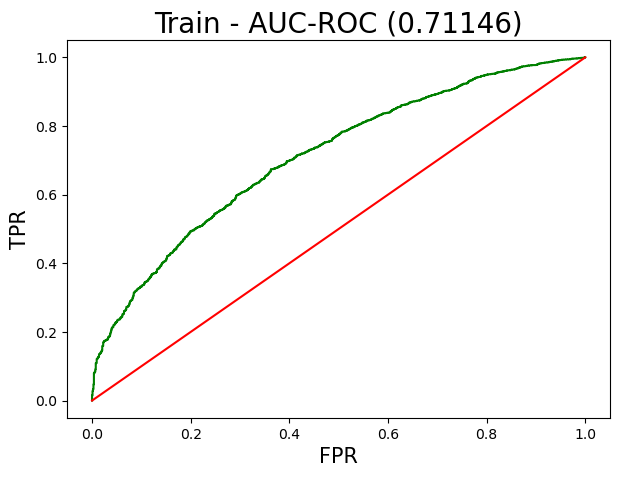

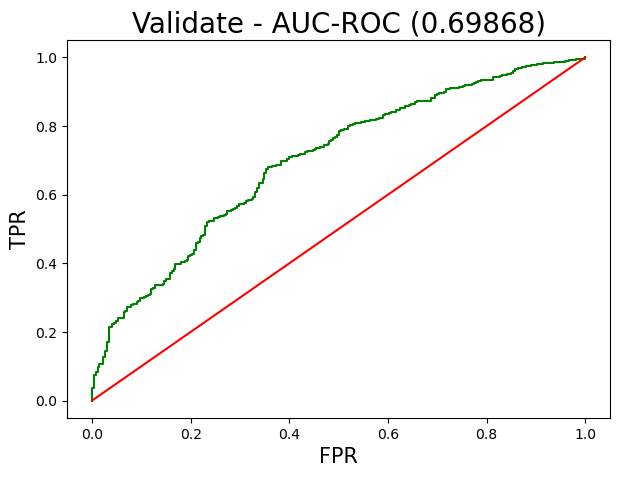

In [529]:
plot_roc_auc(model = lr_best_1 ,X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val)

Correlation between X and y

## 6. Logistic Regression - Kaggle Competition Preparation

**[6.1]** Prepare Kaggle Input File using rf_best Random Forest Model

In [517]:
# File URLs
file_path_test= "data/processed/test.csv"

# Load files into df_training and df_validation data frames
df_test = pd.read_csv(file_path_test)

In [518]:

# Drop Target and ID for X, and create target from y
X_test_id = df_test['Id']
X_test = df_test.drop(['Id'], axis=1)

**[6.2]** Check Test Dataset is ready for predicting

In [519]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3799 entries, 0 to 3798
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GP               3799 non-null   float64
 1   MIN              3799 non-null   float64
 2   PTS              3799 non-null   float64
 3   FGM              3799 non-null   float64
 4   FGA              3799 non-null   float64
 5   FG%              3799 non-null   float64
 6   3P Made          3799 non-null   float64
 7   3PA              3799 non-null   float64
 8   3P%              3799 non-null   float64
 9   FTM              3799 non-null   float64
 10  FTA              3799 non-null   float64
 11  FT%              3799 non-null   float64
 12  OREB             3799 non-null   float64
 13  DREB             3799 non-null   float64
 14  REB              3799 non-null   float64
 15  AST              3799 non-null   float64
 16  STL              3799 non-null   float64
 17  BLK           

**[6.3]** Create y Prediction using the Test Dataset

In [520]:
y_predict = lr_best_1.predict_proba(X_test)

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [521]:
print(y_predict)

[[0.63389353 0.36610647]
 [0.70619755 0.29380245]
 [0.34098824 0.65901176]
 ...
 [0.7022092  0.2977908 ]
 [0.23887647 0.76112353]
 [0.70069004 0.29930996]]


In [522]:
print(y_predict[:,1])

[0.36610647 0.29380245 0.65901176 ... 0.2977908  0.76112353 0.29930996]


**[6.4]** Convert the Numpy Array into a Pandas Dataframe with a Column Name TARGET_5Yrs

In [523]:
# Convert numpy arrany y_predict values back to df_train_cleaned_scaled data frame 
y_predict = pd.DataFrame(y_predict[:,1], columns = ['TARGET_5Yrs'])

**[6.5]** Concatenate Player ID and Prediction into on Data Frame and Sort by Id

In [524]:
y_predict = pd.concat([X_test_id, y_predict], axis=1)

In [525]:
y_predict = y_predict.sort_values(by=['Id'])

In [526]:
print(y_predict)

         Id  TARGET_5Yrs
0         1     0.366106
2         3     0.659012
5         6     0.568039
8        14     0.407130
10       17     0.468676
...     ...          ...
3057  13770     0.708379
3058  13771     0.425001
3059  13774     0.449909
3063  13787     0.418589
3064  13792     0.488821

[3799 rows x 2 columns]


**[6.6]** Export Dataframe to CSV and save model

In [528]:
y_predict.to_csv("data/external/submission_nfragar_20220227_linear_regression_w3_5_add_kmeans_feature.csv", index = False)
y_predict.shape

(3799, 2)